In [7]:
import segmentation_models as sm
from tifffile import imread
import glob
import numpy as np
import torch

Define Model

In [3]:
model_architecture = 'UNet'
spatial_dims = 3
in_channels = 1
out_channels = 1
channels = [32, 128, 256]
strides = [2, 2]
kernel_size = 3

model = sm.Model(model_architecture, spatial_dims, in_channels, out_channels, channels, strides, kernel_size)

Load Model Weights

In [5]:
model_path = './benchmarking/saved_models/3D_unet_dice_lr_0.005_batch_1'
model.load_weights(model_path)

Set Image

In [14]:
test_image = 'uint8_ChaMARCM-F000157_seg001.lsm_c_3.tif.v3dpbd.tif'
model.set_image(test_image)
print(model.image.shape)

test_image = imread(test_image)
model.set_image(test_image)
print(model.image.shape)

test_image = torch.tensor(test_image)
model.set_image(test_image)
print(model.image.shape)

torch.Size([1, 1, 128, 128, 128])
torch.Size([1, 1, 128, 128, 128])
torch.Size([1, 1, 128, 128, 128])


Predict

In [15]:
model.predict()
print(model.prediction.shape)

torch.Size([1, 1, 128, 128, 128])


Plot

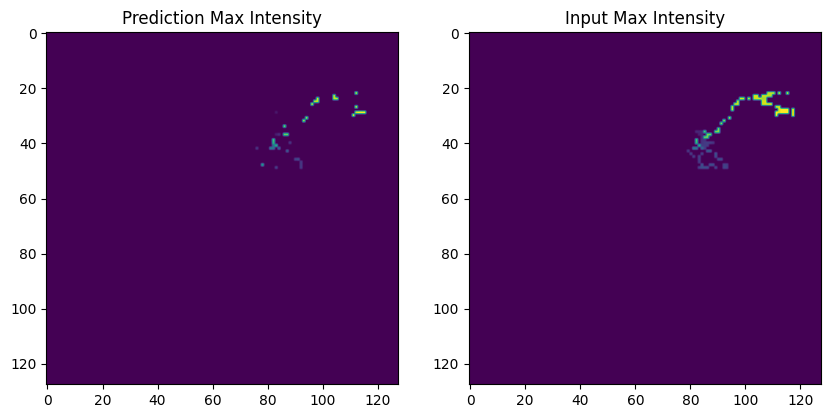

In [16]:
model.create_plots()